### Libraries

In [1]:
library(dviz.supp)
library(lubridate)

Loading required package: cowplot

Loading required package: colorspace

Loading required package: colorblindr

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dviz.supp’


The following objects are masked from ‘package:cowplot’:

    plot_grid, stamp, stamp_bad, stamp_good, stamp_ugly, stamp_wrong


The following object is masked from ‘package:datasets’:

    CO2



Attaching package: ‘lubridate’


The following object is masked from ‘package:dviz.supp’:

    stamp


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Data

In [2]:
head(blue_jays)

,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1
6,1142-05911,F,7.28,9.30,22.25,52.25,63.90,30.00,0


### Plot

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


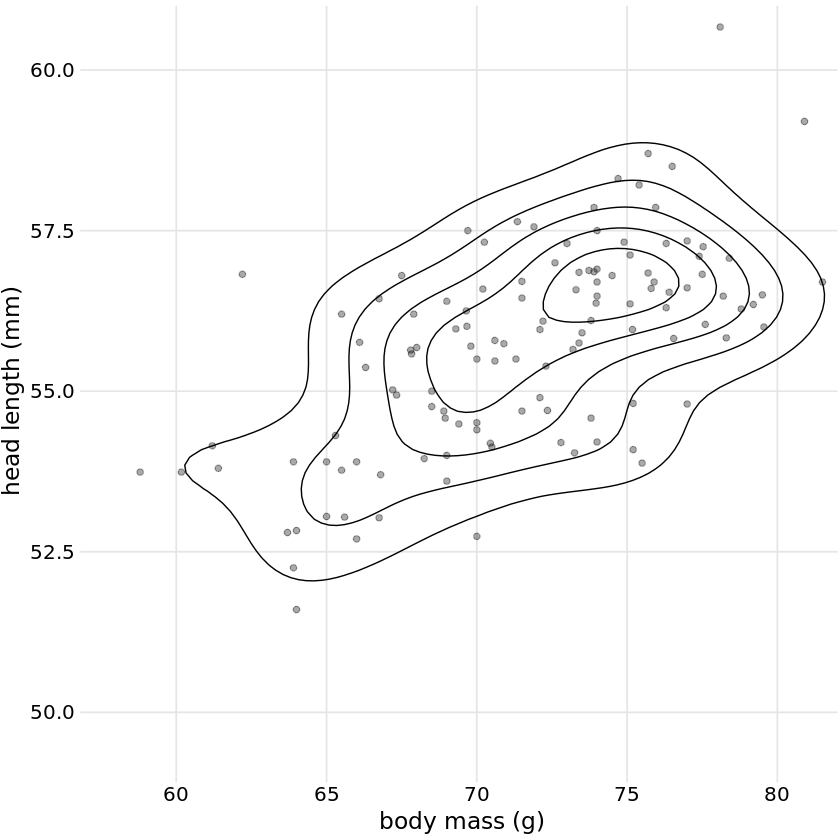

In [3]:
blue_jays_base <- ggplot(blue_jays, aes(Mass, Head)) + 
  scale_x_continuous(
    limits = c(57, 82),
    expand = c(0, 0),
    name = "body mass (g)") +
  scale_y_continuous(
    limits = c(49, 61),
    expand = c(0, 0),
    name = "head length (mm)"
  ) +
  theme_dviz_grid()

blue_jays_base + 
  stat_density_2d(color = "black", size = 0.4, binwidth = 0.004) +
  geom_point(color = "black", size = 1.5, alpha = 1/3)

### Contour filled

Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.”


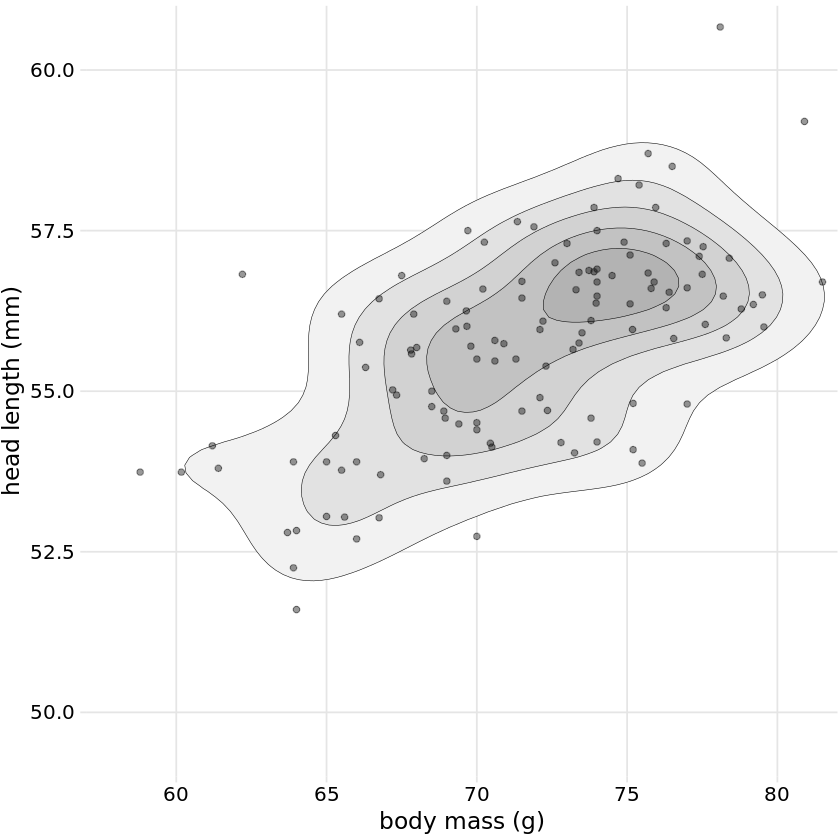

In [4]:
blue_jays_base + 
  stat_density_2d(aes(fill = ..level..), geom = "polygon", color = "black", size = 0.15, binwidth = 0.004) +
  geom_point(color = "black", size = 1.5, alpha = .4) +
  scale_fill_gradient(low = "grey95", high = "grey70", guide = "none")

### Contours by sex

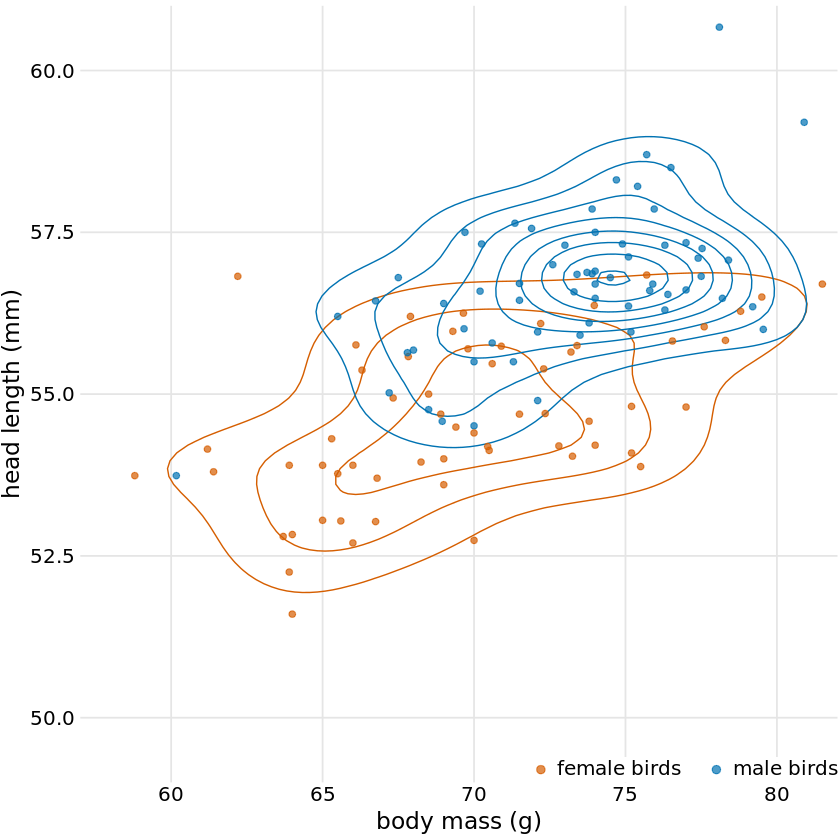

In [5]:
blue_jays_base + 
  aes(color = KnownSex) +
  stat_density_2d(size = 0.4, binwidth = 0.006) +
  geom_point(size = 1.5, alpha = 0.7) +
  scale_color_manual(
    values = c(F = "#D55E00", M = "#0072B2"),
    breaks = c("F", "M"),
    labels = c("female birds   ", "male birds"),
    name = NULL,
    guide = guide_legend(
      direction = "horizontal",
      override.aes = list(size = 2, linetype = 0)
    )
  ) +
  theme_dviz_grid() +
  theme(
    legend.position = c(1, 0),
    legend.justification = c(1, 0),
    #legend.position = "top",
    #legend.justification = "right",
    #legend.box.spacing = unit(3.5, "pt"), # distance between legend and plot
    legend.text = element_text(vjust = 0.6),
    legend.spacing.x = unit(2, "pt"),
    legend.background = element_rect(fill = "white", color = NA),
    #legend.key.width = unit(10, "pt")
    axis.ticks.length = unit(0, "pt"),
    axis.ticks = element_blank()
  )